**ПРЕДСКАЗАНИЕ РОСТА РЕБЕНКА ПО РОСТУ РОДИТЕЛЕЙ**

используем модель множественной линейной регрессии

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

moms_height = np.array([162, 175, 163, 170, 175])
dads_height = np.array([173, 170, 175, 180, 185])
child_height = np.array([168, 172, 168, 181, 180])

In [11]:
# Объедините массивы с ростом матери и отца в одну матрицу признаков X. В качестве целевой переменной y используйте child_height.

# Подготовка данных для sklearn  
X = np.column_stack((moms_height, dads_height))
y = child_height

# Для проверки выведите X на экран
print(X)

[[162 173]
 [175 170]
 [163 175]
 [170 180]
 [175 185]]


In [12]:
#Построение и обучение модели

model = LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# Получение уровня регрессии

# Получение коэффициентов регрессии и свободного члена
coefficients = model.coef_
intercept = model.intercept_

In [15]:
# Уравнение регрессии
equation = f"Child_Height = {intercept:.2f} + {coefficients[0]:.2f}*Mom_Height + {coefficients[1]:.2f}*Dad_Height"

# Вывод уравнения регрессии
print("Уравнение плоскости регрессии:")
print(equation)

Уравнение плоскости регрессии:
Child_Height = -26.36 + 0.48*Mom_Height + 0.67*Dad_Height


In [21]:
#предскажите рост ребенка, если рост его матери составляет 170 см, а рост отца — 175 см.

mom_new = 170
dad_new = 175
child_pred_new = model.predict([[mom_new, dad_new]])
print(f"Предсказание роста ребенка при росте матери = {mom_new} и росте отца = {dad_new}: {child_pred_new[0]:.2f} cm")

Предсказание роста ребенка при росте матери = 170 и росте отца = 175: 173.20 cm


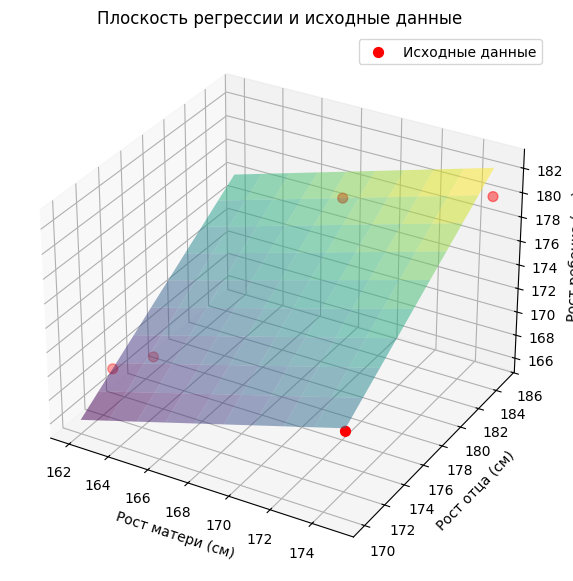

In [24]:
#Построение графика

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Создание 3D-графика
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Нанесение исходных точек
ax.scatter(moms_height, dads_height, child_height, c='r', marker='o', s=50, label='Исходные данные')

# Создание сетки для плоскости регрессии
mom_range = np.linspace(moms_height.min(), moms_height.max(), 10)
dad_range = np.linspace(dads_height.min(), dads_height.max(), 10)
mom_grid, dad_grid = np.meshgrid(mom_range, dad_range) #cоздание сетки значений

# Расчет предсказаний для каждой точки сетки
child_pred_surface = intercept + coefficients[0] * mom_grid + coefficients[1] * dad_grid

# Построение плоскости регрессии
ax.plot_surface(mom_grid, dad_grid, child_pred_surface, alpha=0.5, cmap='viridis')

# Настройка графика
ax.set_xlabel('Рост матери (см)')
ax.set_ylabel('Рост отца (см)')
ax.set_zlabel('Рост ребенка (см)')
ax.set_title('Плоскость регрессии и исходные данные')
plt.legend()
plt.show()